## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [20]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [3]:
imoveis = pd.read_csv('housing.csv')

imoveis.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Codificar a variável categórica 'ocean_proximity' usando one-hot encoding
imoveis_encoded = pd.get_dummies(imoveis, columns=['ocean_proximity'], drop_first=True)

# Selecionar variáveis independentes e a variável dependente
feature_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] + [col for col in imoveis_encoded.columns if col.startswith('ocean_proximity')]
target_column = 'median_house_value'

X = imoveis_encoded[feature_columns]
y = imoveis_encoded[target_column]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de árvore de decisão
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4725597595.049418


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [9]:
# Obter os valores de CCP-alpha e as árvores podadas correspondentes
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Reduzir o número de CCP-alphas para avaliar
ccp_alphas = ccp_alphas[::max(1, len(ccp_alphas)//10)]  # Pegando uma amostra menor dos valores de CCP-alpha

# Treinar e avaliar árvores para alguns valores de CCP-alpha
results = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append((ccp_alpha, mse))

# Encontrar o melhor CCP-alpha
best_alpha, best_mse = min(results, key=lambda x: x[1])
print(f"Melhor CCP-alpha: {best_alpha}")
print(f"Mean Squared Error com o melhor CCP-alpha: {best_mse}")

Melhor CCP-alpha: 360937.6009366956
Mean Squared Error com o melhor CCP-alpha: 4513824533.831862


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [11]:
# Treinar e avaliar árvores para cada valor de CCP-alpha, e guardar as árvores em uma lista
trees = []
results = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append((ccp_alpha, mse))
    trees.append(clf)  # Guardar a árvore treinada na lista

# Mostrar o número de árvores treinadas e os valores de CCP-alpha
print(f"Total de árvores treinadas: {len(trees)}")
print("CCP-alphas usados para treinar as árvores:")
for alpha in ccp_alphas:
    print(alpha)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [16]:
# Calcular o MSE para cada árvore na lista
for i, tree_clf in enumerate(trees):
    y_pred = tree_clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Árvore {i + 1} com CCP-alpha {ccp_alphas[i]}: MSE = {mse}")

Árvore 1 com CCP-alpha 0.0: MSE = 4848725317.094719
Árvore 2 com CCP-alpha 51.1749031007752: MSE = 4849304747.152898
Árvore 3 com CCP-alpha 310.07751937984494: MSE = 4849658842.806184
Árvore 4 com CCP-alpha 1054.0818798449613: MSE = 4849182720.120418
Árvore 5 com CCP-alpha 2853.954699612403: MSE = 4845975934.716943
Árvore 6 com CCP-alpha 7051.053779067919: MSE = 4834554429.734759
Árvore 7 com CCP-alpha 17050.327034883718: MSE = 4825600864.876431
Árvore 8 com CCP-alpha 40794.63132152158: MSE = 4809316343.33275
Árvore 9 com CCP-alpha 108908.72294896148: MSE = 4722136386.624885
Árvore 10 com CCP-alpha 360937.6009366956: MSE = 4513824533.831862
Árvore 11 com CCP-alpha 173573234.65399313: MSE = 5987979522.779489


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

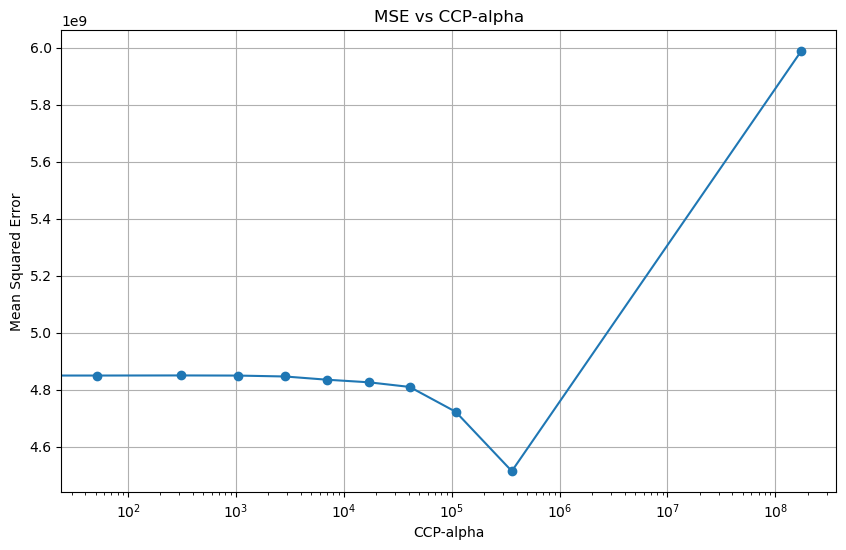

Melhor CCP-alpha: 360937.6009366956 com MSE: 4513824533.831862


In [26]:
# Plotar o gráfico de MSE em função de CCP-alpha
ccp_alpha_values, mse_values = zip(*results)

plt.figure(figsize=(10,6))
plt.plot(ccp_alpha_values, mse_values, marker='o', linestyle='-')
plt.xlabel('CCP-alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs CCP-alpha')
plt.xscale('log')  # Escala logarítmica para melhor visualização
plt.grid(True)
plt.show()

# Escolher um valor de alpha próximo ao ponto de mínimo do MSE
best_alpha, best_mse = min(results, key=lambda x: x[1])
print(f"Melhor CCP-alpha: {best_alpha} com MSE: {best_mse}")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [22]:
# Calcular o R-quadrado
r2 = r2_score(y_test, y_pred)
print(f"R-quadrado com o melhor CCP-alpha: {r2:.4f}")

R-quadrado com o melhor CCP-alpha: 0.5430


### 7. Visualize esta árvore.

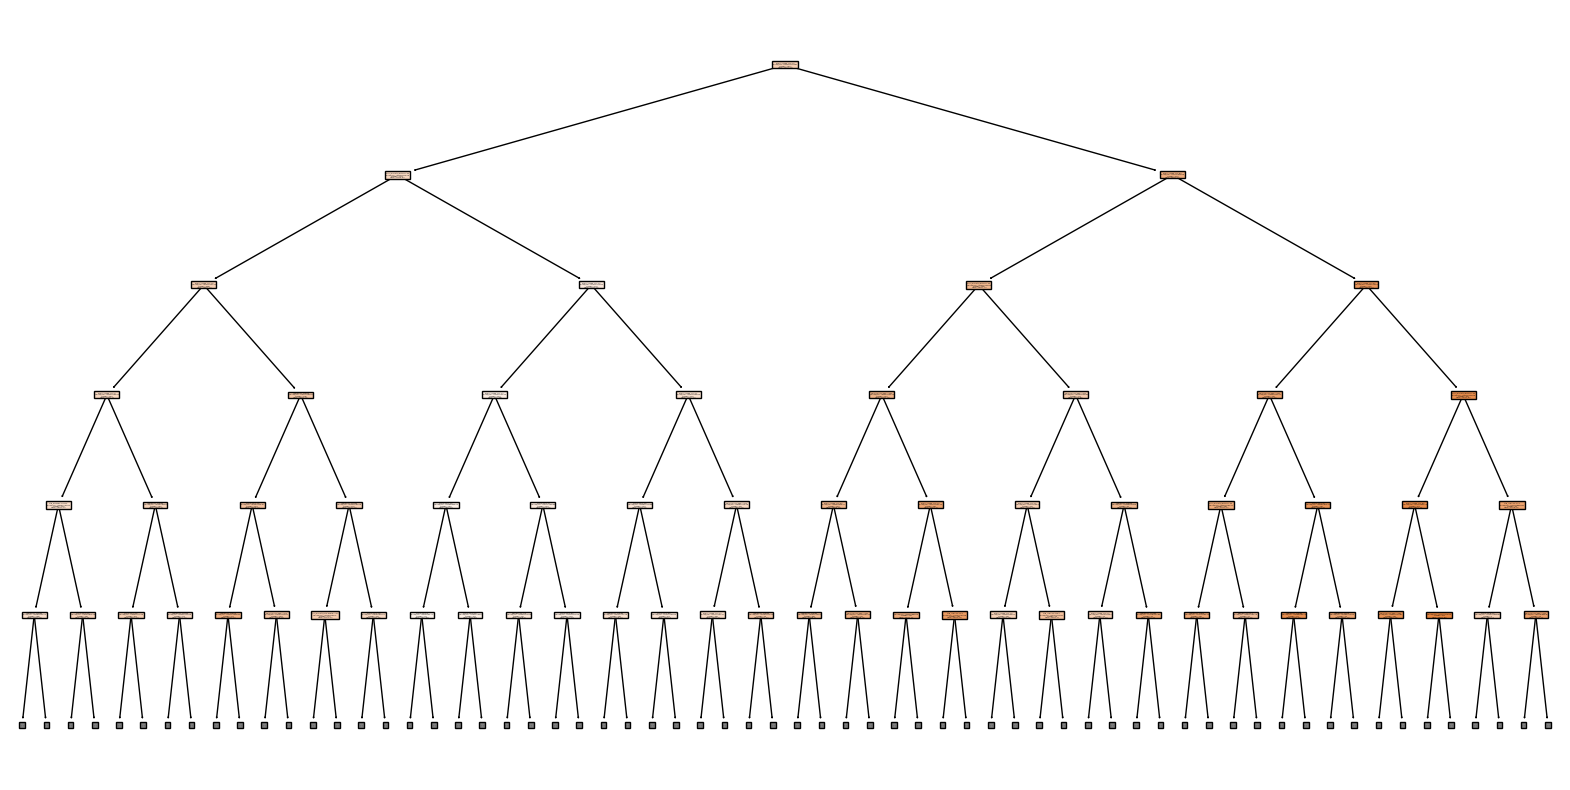

In [24]:
# Visualizar a árvore com o melhor CCP-alpha
plt.figure(figsize=(20,10))
tree.plot_tree(best_clf, feature_names=feature_columns, filled=True, max_depth=5)
plt.show()